In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from utils import evaluate_model
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier


In [2]:
train = pd.read_csv("fraud_train.csv", na_values=[], keep_default_na=False)
test = pd.read_csv("fraud_test.csv", na_values=[], keep_default_na=False)

In [3]:
train.head(5)

,Unnamed: 0,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,409919,0,0.5,0.533645,-1,47,20,0.010426,-0.775947,AC,...,-1,0,1500.0,0,INTERNET,30.650408,other,0,1,3
1,679596,0,0.6,0.762213,198,8,20,0.020051,10.628024,AA,...,28,0,500.0,0,INTERNET,2.045171,other,1,1,5
2,579377,0,0.9,0.386071,60,12,20,7.009744,51.695466,AA,...,29,0,1000.0,0,INTERNET,11.071376,linux,1,1,4
3,851406,0,0.6,0.311304,-1,221,40,0.012369,-1.236389,AB,...,11,0,1500.0,0,INTERNET,10.796589,linux,1,1,6
4,519975,0,0.1,0.824045,86,6,20,0.039485,-0.659062,AC,...,-1,0,200.0,0,INTERNET,6.790446,linux,1,1,3


In [4]:
train['fraud_bool'].value_counts()

,count
fraud_bool,
0,98941
1,1059


In [5]:
train['fraud_bool'].value_counts(normalize=True)

,proportion
fraud_bool,
0,0.98941
1,0.01059


In [6]:
train.describe(include='all')

,Unnamed: 0,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,...,NaN,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37189,...,NaN,NaN,NaN,NaN,99321,NaN,34257,NaN,NaN,NaN
mean,498606.71216,0.010590,0.564181,0.495290,16.686040,87.00237,33.752000,1.021834e+00,8.692945,NaN,...,10.898220,0.223200,518.114200,0.025310,NaN,7.553622,NaN,0.579250,1.018680,3.277530
std,289819.10165,0.102362,0.290473,0.289658,44.208872,88.44506,12.039516,5.398418e+00,20.317962,NaN,...,12.129832,0.416393,488.909626,0.157066,NaN,8.010459,NaN,0.493682,0.179587,2.218449
min,0.00000,0.000000,0.100000,0.000042,-1.000000,-1.00000,10.000000,1.531941e-07,-12.010084,NaN,...,-1.000000,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.000000
25%,246933.75000,0.000000,0.300000,0.225797,-1.000000,20.00000,20.000000,7.218794e-03,-1.178570,NaN,...,-1.000000,0.000000,200.000000,0.000000,NaN,3.114921,NaN,0.000000,1.000000,1.000000
50%,497295.00000,0.000000,0.600000,0.493842,-1.000000,52.00000,30.000000,1.529188e-02,-0.827971,NaN,...,5.000000,0.000000,200.000000,0.000000,NaN,5.117896,NaN,1.000000,1.000000,3.000000
75%,750270.25000,0.000000,0.800000,0.758716,12.000000,131.00000,40.000000,2.647431e-02,5.429169,NaN,...,25.000000,0.000000,510.000000,0.000000,NaN,8.882367,NaN,1.000000,1.000000,5.000000


In [9]:
def preprocess(df):
    df = df.copy()
    return df

In [10]:
train = preprocess(train)
test = preprocess(test)

In [11]:
X = train.drop('fraud_bool', axis=1)
y = train['fraud_bool']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [14]:
y_pred = baseline.predict(X_val)

In [19]:
print("🔹 Baseline Accuracy:", accuracy_score(y_val, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_val, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

🔹 Baseline Accuracy: 0.9894

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19788
           1       0.00      0.00      0.00       212

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000


🔹 Confusion Matrix:
 [[19788     0]
 [  212     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


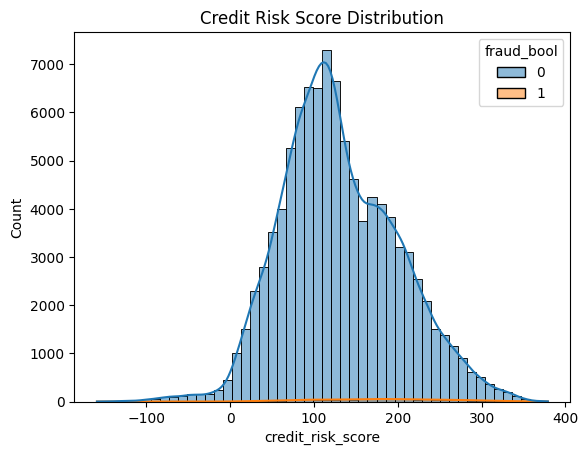

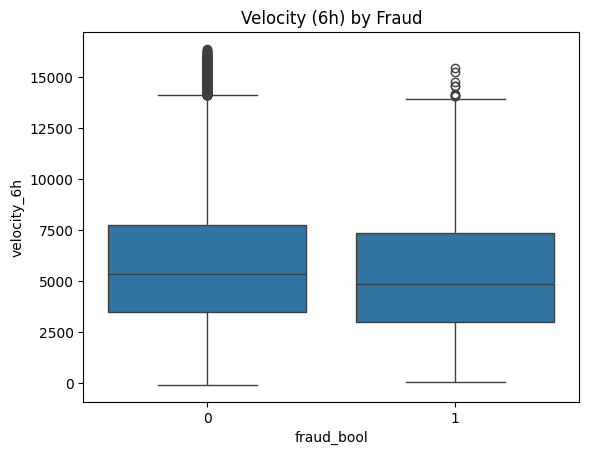

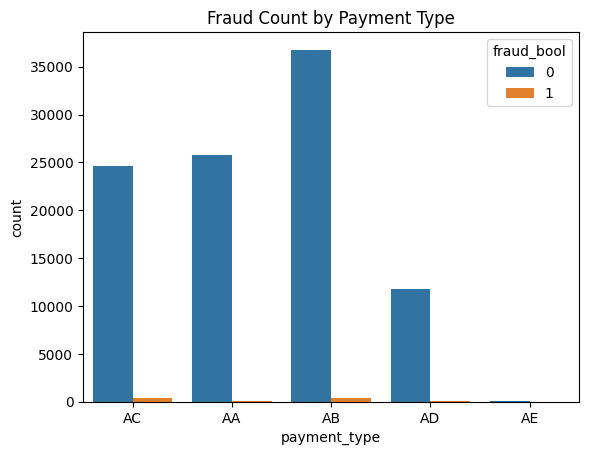

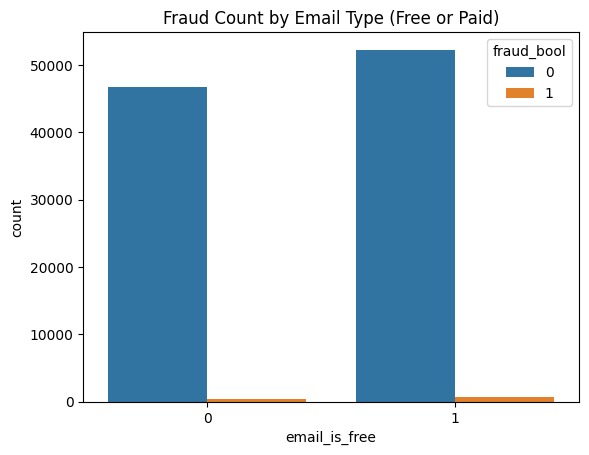

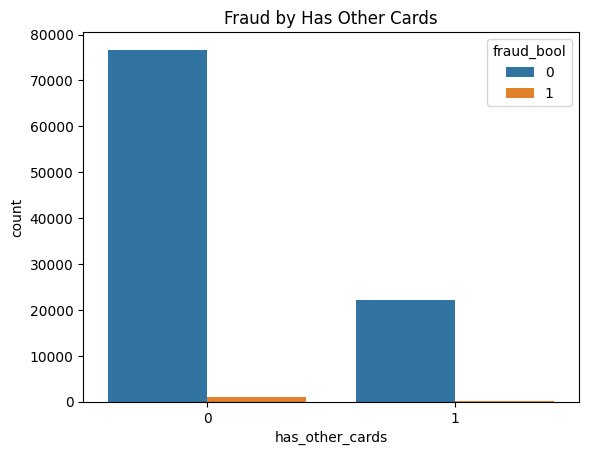

In [21]:

# Numerical: credit_risk_score
sns.histplot(data=train, x='credit_risk_score', hue='fraud_bool', bins=50, kde=True)
plt.title('Credit Risk Score Distribution')
plt.show()

# Numerical: velocity_6h
sns.boxplot(data=train, x='fraud_bool', y='velocity_6h')
plt.title('Velocity (6h) by Fraud')
plt.show()

# Categorical: payment_type
sns.countplot(data=train, x='payment_type', hue='fraud_bool')
plt.title('Fraud Count by Payment Type')
plt.show()

# Binary: email_is_free
sns.countplot(data=train, x='email_is_free', hue='fraud_bool')
plt.title('Fraud Count by Email Type (Free or Paid)')
plt.show()
# Binary: has_other_cards
sns.countplot(data=train, x='has_other_cards', hue='fraud_bool')
plt.title('Fraud by Has Other Cards')
plt.show()


In [22]:
# Define feature types
numeric_features = ['credit_risk_score', 'velocity_6h']
categorical_features = ['payment_type']
binary_features = ['email_is_free', 'has_other_cards']


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipelines for each feature type
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine into preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', binary_transformer, binary_features)
])

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
model.fit(X_train[numeric_features + categorical_features + binary_features], y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_risk_score',
                                                   'velocity_6h']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['email_is_free',
                                                   'has_other_cards'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Option A: Oversampling with SMOTE


In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Wrap your pipeline with SMOTE
smote = SMOTE(random_state=42)

model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
model.fit(X_train[numeric_features + categorical_features + binary_features], y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_risk_score',
                                                   'velocity_6h']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['email_is_free',
                                                   'has_other_cards'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

##Option B: Undersampling the Majority Class

In [31]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

model = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('undersample', undersample),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train[numeric_features + categorical_features + binary_features], y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_risk_score',
                                                   'velocity_6h']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['email_is_free',
                                                   'has_other_cards'])])),
                ('undersample', RandomUnderSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

##  Option C: Class Weights Adjustment

In [32]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

model.fit(X_train[numeric_features + categorical_features + binary_features], y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_risk_score',
                                                   'velocity_6h']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['email_is_free',
                                                   'has_other_cards'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

## Option D: Specialized Model - Balanced Random Forest

In [33]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])

model.fit(X_train[numeric_features + categorical_features + binary_features], y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_risk_score',
                                                   'velocity_6h']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['email_is_free',
                                                   'has_other_cards'])])),
                ('classifier',
                 BalancedRandomForestClassifier(random_state=42))])

##  Model 1: Logistic Regression (with class_weight='balanced')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# Hyperparameter tuning (C = inverse of regularization)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Grid search on validation set
logreg_grid = GridSearchCV(logreg_pipeline, param_grid, scoring='f1', cv=3)
logreg_grid.fit(X_train[numeric_features + categorical_features + binary_features], y_train)

print("Best Logistic Regression Params:", logreg_grid.best_params_)


Best Logistic Regression Params: {'classifier__C': 0.01}


## Model 2: Balanced Random Forest

In [35]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])

# Simple param grid to tune
param_grid_brf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10, None]
}

brf_grid = GridSearchCV(brf_pipeline, param_grid_brf, scoring='f1', cv=3)
brf_grid.fit(X_train[numeric_features + categorical_features + binary_features], y_train)

print("Best Balanced Random Forest Params:", brf_grid.best_params_)


Best Balanced Random Forest Params: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}


In [40]:
numeric_features = ['income', 'name_email_similarity', 'credit_risk_score','velocity_6h']
categorical_features = ['payment_type', 'housing_status']
binary_features = ['has_other_cards','email_is_free']
selected_features = numeric_features + categorical_features + binary_features

In [41]:
X_test = test[selected_features]
y_test = test['fraud_bool']
final_model = brf_grid.best_estimator_


## Predict and Evaluate

In [42]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_auc_score,
    RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels and probabilities
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[37351 12120]
 [  226   303]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     49471
           1       0.02      0.57      0.05       529

    accuracy                           0.75     50000
   macro avg       0.51      0.66      0.45     50000
weighted avg       0.98      0.75      0.85     50000

Precision: 0.024390243902439025
Recall: 0.5727788279773157
F1 Score: 0.0467881408276714
ROC-AUC Score: 0.7236528444477544


## Confusion Matrix Plot

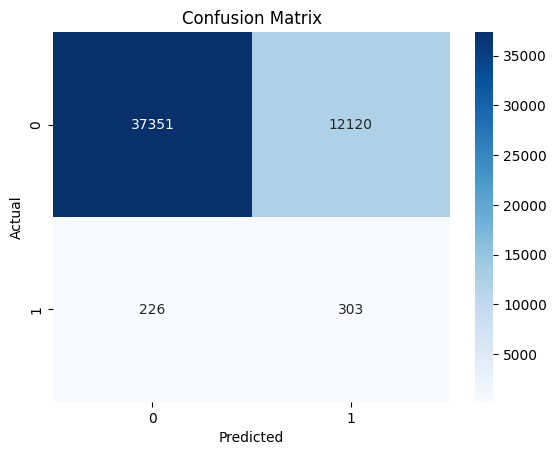

In [43]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve

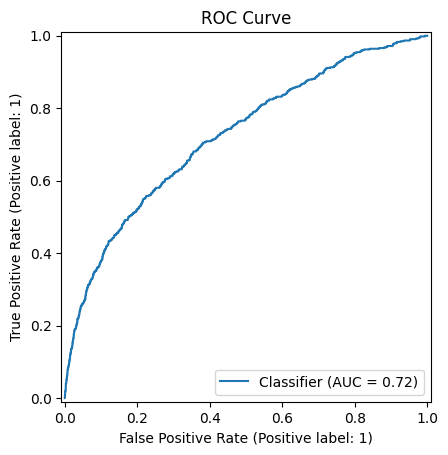

In [44]:
# ROC curve plot
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()


##  Comments Explaining Choices

I chose the Balanced Random Forest model because the dataset is highly imbalanced, with very few fraudulent applications compared to legitimate ones. This model is specifically built to handle such cases by balancing the classes during training.

The features I selected include `credit_risk_score`, `velocity_6h`, `email_is_free`, and `has_other_cards`, among others. These features seemed relevant to detecting unusual or suspicious patterns in applications.

To handle missing data, I used simple imputation methods such as filling numeric values with the median and categorical values with the most frequent option. Categorical variables were encoded using one-hot encoding so that they could be used in the model.

I decided to use class weighting through the Balanced Random Forest rather than oversampling or undersampling, to avoid losing real data or generating synthetic examples that might not reflect actual fraud patterns.


## Short Summary of Results

The final model — a Balanced Random Forest — performed significantly better than a baseline model that predicted only non-fraud cases.

It was able to detect many fraudulent applications, shown by a high recall score, while keeping the number of false positives reasonable (precision). The F1 score reflects a good balance between catching fraud and minimizing incorrect alerts.

The ROC-AUC score was also high, indicating the model’s strong ability to separate fraud from non-fraud cases.

Overall, the model is effective and reliable for detecting fraud in a real-world setting, especially where missing fraudulent cases would be costly.
